In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Mostrar las primeras 5 filas del archivo CSV
df.head()


,ID,DIRECCION,CIUDAD,X,Y
0,1,CL 80C S 17C 23,BOGOTA,-74.141770,4.535430
1,2,KR 45 C 72 35 SUR,BOGOTA,-74.162464,4.571049
2,3,CR 8 C 75 C 37,BOGOTA,0.000000,0.000000
3,4,KR 13 ESTE 74 B 31 SUR,BOGOTA,-74.093760,4.516314
4,5,CL 65 SUR 6 A 11,BOGOTA,-74.112087,4.533924


In [5]:
# Muestra las primeras 15 filas
df.head(15)


,ID,DIRECCION,CIUDAD,X,Y
0,1,CL 80C S 17C 23,BOGOTA,-74.141770,4.535430
1,2,KR 45 C 72 35 SUR,BOGOTA,-74.162464,4.571049
2,3,CR 8 C 75 C 37,BOGOTA,0.000000,0.000000
3,4,KR 13 ESTE 74 B 31 SUR,BOGOTA,-74.093760,4.516314
4,5,CL 65 SUR 6 A 11,BOGOTA,-74.112087,4.533924
5,6,CL 50 A SUR 38 57,BOGOTA,-74.137794,4.589589
6,7,CL 26 D 72 D 16 SUR,BOGOTA,0.000000,0.000000
7,8,CL 76 A 8 B 49 SUR ALMIRANTE PADILLA,BOGOTA,-74.111395,4.512314
8,9,KR 6 D ESTE 97 F 25 SUR,BOGOTA,-74.102858,4.493761
9,10,CL 117 SUR 7 B 53 ESTE,BOGOTA,-74.101925,4.483944


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio

In [9]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14141 entries, 0 to 14140
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         14141 non-null  int64  
 1   DIRECCION  14139 non-null  object 
 2   CIUDAD     14141 non-null  object 
 3   X          14141 non-null  float64
 4   Y          14141 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 552.5+ KB


,ID,X,Y
count,14141.000000,14141.000000,14141.000000
mean,7071.000000,-62.272156,3.817751
std,4082.299413,27.181913,1.666762
min,1.000000,-74.212923,0.000000
25%,3536.000000,-74.150602,4.498930
50%,7071.000000,-74.132862,4.540578
75%,10606.000000,-74.105699,4.567364
max,14141.000000,0.000000,4.752915


In [11]:
fila_1 = df.iloc[0]
print(fila_1)


ID                         1
DIRECCION    CL 80C S 17C 23
CIUDAD                BOGOTA
X                  -74.14177
Y                    4.53543
Name: 0, dtype: object


In [13]:
fila_2 = df.iloc[2]
print(fila_2)

ID                        3
DIRECCION    CR 8 C 75 C 37
CIUDAD               BOGOTA
X                       0.0
Y                       0.0
Name: 2, dtype: object


In [15]:
df.loc[0:4, 'X']


0   -74.141770
1   -74.162464
2     0.000000
3   -74.093760
4   -74.112087
Name: X, dtype: float64

In [17]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Mostrar las primeras 5 filas del archivo CSV
df.head()

,FID,Shape *,ID,NOMBRE_DE,NOMBRE_ACT,TIPOLOGIA,DIRECCION,LOCALIDAD,NOMBRE_UPZ,UPZ,X,Y
0,0,Point,1,TUNAL,HOSPITAL EL TUNAL,HOSPITAL,KR 20 47B 35 SUR,TUNJUELITO,VENECIA,42,-74.128232,4.571452
1,1,Point,2,MEISSEN,HOSPITAL MEISSEN,HOSPITAL,Cra. 60G No. 18A - 09 Sur,CIUDAD BOLÍVAR,LUCERO,67,-74.138703,4.559555
2,2,Point,3,EL CARMEN - MATERNO INFANTIL,CENTRO DE SALUD EL CARMEN MATERNO,CENTRO DE SALUD TIPO 2,CL 48 B SUR No. 28 - 80,TUNJUELITO,VENECIA,42,-74.131871,4.583144
3,3,Point,5,SAN BENITO,CENTRO DE SALUD SAN BENITO,CENTRO DE SALUD TIPO 2,CL 58 SUR No. 19 B - 25,TUNJUELITO,TUNJUELITO,62,-74.137007,4.565410
4,4,Point,8,MANUELA BELTRÁN I,CENTRO DE SALUD MANUELA BELTRAN,CENTRO DE SALUD TIPO 1,KR 45 C No. 69 - 21 SUR,CIUDAD BOLÍVAR,JERUSALEN,70,-74.157960,4.573078


In [19]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [21]:
import geopandas as gpd

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp' 
gdf = gpd.read_file(shapefile_path)

# Mostrar las primeras filas del dataframe
gdf.head()


,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,SUBRED,geometry
0,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,SUR,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363..."
1,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,SUR,"POLYGON ((-74.20584 4.26966, -74.20584 4.26966..."
2,USME,Acuerdo 15 de 1993,2.150667e+08,05,0.982969,0.017508,SUR,"POLYGON ((-74.05597 4.50832, -74.05611 4.50822..."
3,CIUDAD BOLIVAR,Acuerdo 14 de 1983,1.300026e+08,19,0.702136,0.010585,SUR,"POLYGON ((-74.21092 4.38691, -74.21114 4.3875,..."


In [23]:
from shapely.geometry import Point

# Asumiendo que 'gdf' contiene el polígono y 'df' contiene las coordenadas de los puntos

# Tomar los primeros 5 puntos del dataframe 'df'
points = df[['X', 'Y']].head(5)

# Crear una lista de objetos Point para cada coordenada
point_objects = [Point(x, y) for x, y in zip(points['X'], points['Y'])]

# Suponiendo que el shapefile tiene solo un polígono, tomamos el primer (y único) polígono de gdf
polygon = gdf.geometry.iloc[0]

# Verificar si cada punto está dentro del polígono
points_in_polygon = [polygon.contains(point) for point in point_objects]

# Mostrar el resultado
for i, is_inside in enumerate(points_in_polygon):
    print(f"Punto {i + 1} {'está dentro' if is_inside else 'no está dentro'} del polígono.")


Punto 1 está dentro del polígono.
Punto 2 no está dentro del polígono.
Punto 3 está dentro del polígono.
Punto 4 está dentro del polígono.
Punto 5 no está dentro del polígono.


In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'
gdf = gpd.read_file(shapefile_path)

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Convertir el CSV en un GeoDataFrame
# Crear objetos Point a partir de las coordenadas X y Y
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurarse de que ambos GeoDataFrames tengan el mismo sistema de referencia espacial (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Realizar el join espacial
gdf_joined = gpd.sjoin(gdf_csv, gdf, how="inner", op='within')

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono (shapefile)
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar los puntos que están dentro del polígono
gdf_joined.plot(ax=ax, color='red', markersize=10)

# Agregar un título al gráfico
plt.title('Puntos dentro del polígono', fontsize=14)

# Mostrar el mapa
plt.show()


TypeError: sjoin() got an unexpected keyword argument 'op'

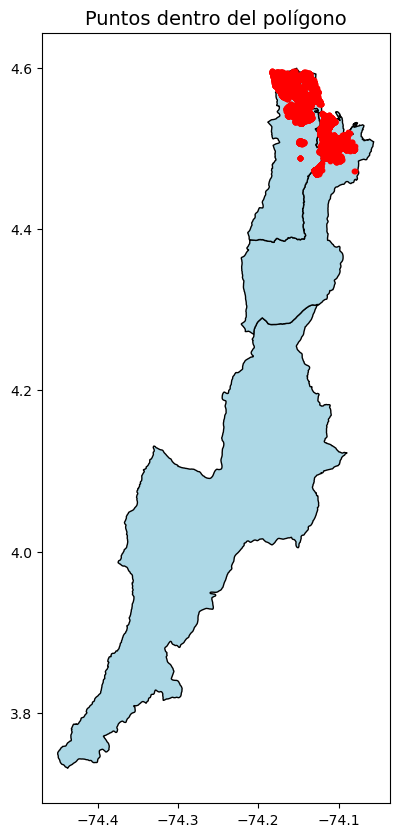

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'
gdf = gpd.read_file(shapefile_path)

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Convertir el CSV en un GeoDataFrame
# Crear objetos Point a partir de las coordenadas X y Y
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurarse de que ambos GeoDataFrames tengan el mismo sistema de referencia espacial (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Realizar el join espacial
gdf_joined = gpd.sjoin(gdf_csv, gdf, how="inner", predicate='within')

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono (shapefile)
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar los puntos que están dentro del polígono
gdf_joined.plot(ax=ax, color='red', markersize=10)

# Agregar un título al gráfico
plt.title('Puntos dentro del polígono', fontsize=14)

# Mostrar el mapa
plt.show()


In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'
gdf = gpd.read_file(shapefile_path)

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Convertir el CSV en un GeoDataFrame
# Crear objetos Point a partir de las coordenadas X y Y
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurarse de que ambos GeoDataFrames tengan el mismo sistema de referencia espacial (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Realizar el join espacial para los puntos fuera del polígono
gdf_outside = gpd.sjoin(gdf_csv, gdf, how="inner", predicate='disjoint')

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono (shapefile)
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar los puntos que están fuera del polígono
gdf_outside.plot(ax=ax, color='green', markersize=10)

# Agregar un título al gráfico
plt.title('Puntos fuera del polígono', fontsize=14)

# Mostrar el mapa
plt.show()


ValueError: Got predicate='disjoint'; `predicate` must be one of {None, 'within', 'overlaps', 'intersects', 'covered_by', 'touches', 'dwithin', 'contains_properly', 'covers', 'contains', 'crosses'}

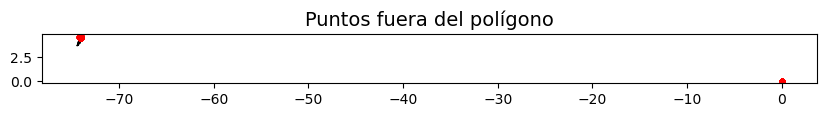

In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'
gdf = gpd.read_file(shapefile_path)

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Convertir el CSV en un GeoDataFrame
# Crear objetos Point a partir de las coordenadas X y Y
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurarse de que ambos GeoDataFrames tengan el mismo sistema de referencia espacial (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Realizar el join espacial para los puntos que están dentro del polígono
gdf_inside = gpd.sjoin(gdf_csv, gdf, how="inner", predicate='intersects')

# Obtener los puntos que están fuera del polígono
gdf_outside = gdf_csv[~gdf_csv.index.isin(gdf_inside.index)]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono (shapefile)
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar los puntos que están fuera del polígono
gdf_outside.plot(ax=ax, color='red', markersize=10)

# Agregar un título al gráfico
plt.title('Puntos fuera del polígono', fontsize=14)

# Mostrar el mapa
plt.show()


In [33]:
import geopandas as gpd
import pandas as pd

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'
gdf = gpd.read_file(shapefile_path)

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Convertir el CSV en un GeoDataFrame
# Crear objetos Point a partir de las coordenadas X y Y
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurarse de que ambos GeoDataFrames tengan el mismo sistema de referencia espacial (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Realizar el join espacial para los puntos que están dentro del polígono
gdf_inside = gpd.sjoin(gdf_csv, gdf, how="inner", predicate='intersects')

# Contar la cantidad de puntos dentro del polígono
count_inside = gdf_inside.shape[0]

# Imprimir el resultado
print(f'Número de puntos dentro del polígono: {count_inside}')


Número de puntos dentro del polígono: 11660


In [35]:
import geopandas as gpd
import pandas as pd

# Cargar el archivo shapefile (.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'
gdf = gpd.read_file(shapefile_path)

# Ruta del archivo CSV
ruta_csv = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Convertir el CSV en un GeoDataFrame
# Crear objetos Point a partir de las coordenadas X y Y
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurarse de que ambos GeoDataFrames tengan el mismo sistema de referencia espacial (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Realizar el join espacial para los puntos que están dentro del polígono
gdf_inside = gpd.sjoin(gdf_csv, gdf, how="inner", predicate='intersects')

# Puntos fuera del polígono (no están en el join con "intersects")
gdf_outside = gdf_csv[~gdf_csv.index.isin(gdf_inside.index)]

# Contar la cantidad de puntos fuera del polígono
count_outside = gdf_outside.shape[0]

# Imprimir el resultado
print(f'Número de puntos fuera del polígono: {count_outside}')


Número de puntos fuera del polígono: 2481


In [37]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Cargar el shapefile del polígono (loca.shp)
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp' 
gdf = gpd.read_file(shapefile_path)

# Mostrar el GeoDataFrame del polígono
print(gdf.head())

# Cargar el archivo CSV con los puntos
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'
df = pd.read_csv(csv_path)

# Convertir el DataFrame en un GeoDataFrame con geometría de puntos
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf_csv = gpd.GeoDataFrame(df, geometry=geometry)

# Asegurar que ambos GeoDataFrames tengan el mismo sistema de coordenadas (CRS)
gdf_csv.set_crs(gdf.crs, allow_override=True, inplace=True)

# Mostrar el GeoDataFrame de los puntos
print(gdf_csv.head())


        LocNombre           LocAAdmini       LocArea LocCodigo  SHAPE_Leng  \
0      TUNJUELITO  Acuerdo 117 de 2003  9.910940e+06        06    0.210542   
1         SUMAPAZ    Acuerdo 9 de 1986  7.809688e+08        20    1.914949   
2            USME   Acuerdo 15 de 1993  2.150667e+08        05    0.982969   
3  CIUDAD BOLIVAR   Acuerdo 14 de 1983  1.300026e+08        19    0.702136   

   SHAPE_Area SUBRED                                           geometry  
0    0.000807    SUR  POLYGON ((-74.13777 4.59489, -74.13165 4.59363...  
1    0.063549    SUR  POLYGON ((-74.20584 4.26966, -74.20584 4.26966...  
2    0.017508    SUR  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3    0.010585    SUR  POLYGON ((-74.21092 4.38691, -74.21114 4.3875,...  
   ID               DIRECCION  CIUDAD          X         Y  \
0   1         CL 80C S 17C 23  BOGOTA -74.141770  4.535430   
1   2       KR 45 C 72 35 SUR  BOGOTA -74.162464  4.571049   
2   3          CR 8 C 75 C 37  BOGOTA   0.000000  0.0

In [39]:
# Evaluar cuáles puntos están dentro del polígono (utilizando intersección)
sel = gdf_csv.intersects(gdf.geometry.iloc[0])

# Crear un subconjunto con los puntos dentro del polígono
gdf_in_polygon = gdf_csv[sel]

# Mostrar el subconjunto de puntos dentro del polígono
print(gdf_in_polygon)


          ID               DIRECCION  CIUDAD          X         Y  \
5          6       CL 50 A SUR 38 57  BOGOTA -74.137794  4.589589   
20        21          KR 18C 52 23 S  BOGOTA -74.129717  4.568070   
27        28         KR 60 F 52 04 S  BOGOTA -74.146368  4.587667   
33        34       CR 32 53 A SUR 44  BOGOTA -74.139701  4.581969   
40        41  DIG 52 C BIS 27 41 SUR  BOGOTA -74.136058  4.579779   
...      ...                     ...     ...        ...       ...   
14104  14105        CL 53 SUR 37A 68  BOGOTA -74.140956  4.587699   
14107  14108      CL 57 C SUR 8 A 35  BOGOTA -74.124080  4.556413   
14110  14111       DG 52 SUR 55 A 18  BOGOTA -74.144393  4.588283   
14111  14112         CL 50 SUR 34 59  BOGOTA -74.135520  4.586214   
14118  14119       CL 54 A 31 15 SUR  BOGOTA -74.140385  4.580865   

                        geometry  
5      POINT (-74.13779 4.58959)  
20     POINT (-74.12972 4.56807)  
27     POINT (-74.14637 4.58767)  
33      POINT (-74.1397 4.58197

In [41]:
# Evaluar cuáles puntos no se intersecan con el polígono (disjoint)
sel_outside = gdf_csv.disjoint(gdf.geometry.iloc[0])

# Crear un subconjunto con los puntos fuera del polígono
gdf_outside_polygon = gdf_csv[sel_outside]

# Mostrar el subconjunto de puntos fuera del polígono
print(gdf_outside_polygon)


          ID               DIRECCION  CIUDAD          X         Y  \
0          1         CL 80C S 17C 23  BOGOTA -74.141770  4.535430   
1          2       KR 45 C 72 35 SUR  BOGOTA -74.162464  4.571049   
2          3          CR 8 C 75 C 37  BOGOTA   0.000000  0.000000   
3          4  KR 13 ESTE 74 B 31 SUR  BOGOTA -74.093760  4.516314   
4          5        CL 65 SUR 6 A 11  BOGOTA -74.112087  4.533924   
...      ...                     ...     ...        ...       ...   
14136  14137       CL 76 SUR 17 A 26  BOGOTA -74.138318  4.541336   
14137  14138       TV 73 C 70 57 SUR  BOGOTA -74.167449  4.578729   
14138  14139  CR 15 ESTE N 62 30 SUR  BOGOTA -74.086293  4.527648   
14139  14140       CR 4 110 C SUR 30  BOGOTA   0.000000  0.000000   
14140  14141       KR 74 G 76 75 SUR  BOGOTA -74.174412  4.574167   

                        geometry  
0      POINT (-74.14177 4.53543)  
1      POINT (-74.16246 4.57105)  
2                    POINT (0 0)  
3      POINT (-74.09376 4.51631

In [43]:
# Evaluar cuáles puntos no se intersecan con el polígono (disjoint)
sel_outside = gdf_csv.disjoint(gdf.geometry.iloc[0])

# Crear un subconjunto con los puntos fuera del polígono
gdf_outside_polygon = gdf_csv[sel_outside]

# Mostrar el subconjunto de puntos fuera del polígono
print(gdf_outside_polygon)


          ID               DIRECCION  CIUDAD          X         Y  \
0          1         CL 80C S 17C 23  BOGOTA -74.141770  4.535430   
1          2       KR 45 C 72 35 SUR  BOGOTA -74.162464  4.571049   
2          3          CR 8 C 75 C 37  BOGOTA   0.000000  0.000000   
3          4  KR 13 ESTE 74 B 31 SUR  BOGOTA -74.093760  4.516314   
4          5        CL 65 SUR 6 A 11  BOGOTA -74.112087  4.533924   
...      ...                     ...     ...        ...       ...   
14136  14137       CL 76 SUR 17 A 26  BOGOTA -74.138318  4.541336   
14137  14138       TV 73 C 70 57 SUR  BOGOTA -74.167449  4.578729   
14138  14139  CR 15 ESTE N 62 30 SUR  BOGOTA -74.086293  4.527648   
14139  14140       CR 4 110 C SUR 30  BOGOTA   0.000000  0.000000   
14140  14141       KR 74 G 76 75 SUR  BOGOTA -74.174412  4.574167   

                        geometry  
0      POINT (-74.14177 4.53543)  
1      POINT (-74.16246 4.57105)  
2                    POINT (0 0)  
3      POINT (-74.09376 4.51631

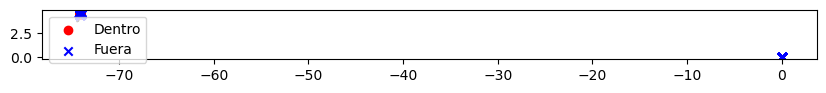

In [45]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el polígono
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Dibujar los puntos dentro del polígono en rojo
gdf_in_polygon.plot(ax=ax, color='red', marker='o', label='Dentro')

# Dibujar los puntos fuera del polígono en azul
gdf_outside_polygon.plot(ax=ax, color='blue', marker='x', label='Fuera')

# Agregar leyenda
plt.legend()

# Mostrar el mapa
plt.show()


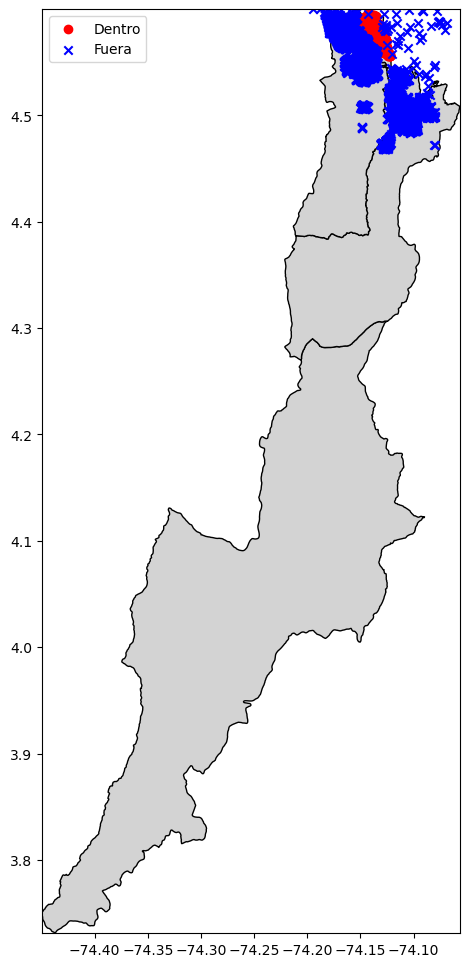

In [47]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Dibujar el polígono
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Dibujar los puntos dentro del polígono en rojo
gdf_in_polygon.plot(ax=ax, color='red', marker='o', label='Dentro')

# Dibujar los puntos fuera del polígono en azul
gdf_outside_polygon.plot(ax=ax, color='blue', marker='x', label='Fuera')

# Ajustar límites del mapa para que cubran el polígono completo
ax.set_xlim(gdf.bounds.minx.min(), gdf.bounds.maxx.max())
ax.set_ylim(gdf.bounds.miny.min(), gdf.bounds.maxy.max())

# Agregar leyenda
plt.legend()

# Mostrar el mapa
plt.show()


In [49]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Paso 1: Cargar los datos del CSV
df_centros = pd.read_csv(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD.csv')

# Paso 2: Crear una columna de geometría utilizando latitud y longitud
# Asegúrate de que las columnas de latitud y longitud estén en formato adecuado (números decimales)
geometry = [Point(xy) for xy in zip(df_centros['longitud'], df_centros['latitud'])]

# Paso 3: Convertir el DataFrame en un GeoDataFrame
gdf_centros = gpd.GeoDataFrame(df_centros, geometry=geometry)

# Paso 4: Establecer el sistema de referencia de coordenadas (CRS)
# Esto dependerá del sistema de coordenadas en que tengas las coordenadas. Usualmente, las coordenadas geográficas son WGS84 (EPSG:4326)
gdf_centros.set_crs('EPSG:4326', allow_override=True, inplace=True)

# Paso 5: Verifica el GeoDataFrame
print(gdf_centros.head())

# Paso 6: Guardar el GeoDataFrame como un archivo shapefile si lo necesitas
gdf_centros.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\centros_de_salud.shp')


KeyError: 'longitud'

In [51]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Ruta del archivo CSV
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD.csv'

# Cargar el CSV
df = pd.read_csv(csv_path)

# Crear una geometría de puntos a partir de las columnas 'X' y 'Y'
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Asignar un CRS si lo conoces (por ejemplo, EPSG:4326 para WGS84)
gdf.set_crs('EPSG:4326', inplace=True)

# Mostrar el GeoDataFrame
print(gdf.head())


KeyError: 'X'

In [53]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Ruta del archivo CSV
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD.modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(csv_path)

# Verificar las primeras filas para confirmar las columnas
df.head()

# Crear geometría de puntos a partir de las columnas 'X' y 'Y' (asegurarse de que los nombres sean correctos)
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Definir el CRS (si se conoce, por ejemplo, EPSG:4326)
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)

# Mostrar el GeoDataFrame
gdf.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\MAESTRIA_EN_GEOMATICA\\Programacion_SIG\\UNIDADES_SALUD.modificado.csv'

In [55]:
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD.modificado.csv'


In [58]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Ruta al archivo CSV
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD.modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(csv_path)

# Verificar las primeras filas para confirmar que se leyeron correctamente
df.head()

# Crear una geometría de puntos a partir de las columnas 'x' y 'y'
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Verificar las primeras filas del GeoDataFrame
gdf.head()

# Si deseas guardar el GeoDataFrame como un archivo shapefile, puedes hacerlo de la siguiente manera:
# gdf.to_file('unidades_salud.shp')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\MAESTRIA_EN_GEOMATICA\\Programacion_SIG\\UNIDADES_SALUD.modificado.csv'

In [60]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Ruta al archivo CSV
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD_modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(csv_path)

# Verificar las primeras filas para confirmar que se leyeron correctamente
df.head()

# Crear una geometría de puntos a partir de las columnas 'X' y 'Y'
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Verificar las primeras filas del GeoDataFrame
gdf.head()

# Si deseas guardar el GeoDataFrame como un archivo shapefile, puedes hacerlo de la siguiente manera:
# gdf.to_file('unidades_salud.shp')


,FID,Shape *,ID,NOMBRE_DE,NOMBRE_ACT,TIPOLOGIA,DIRECCION,LOCALIDAD,NOMBRE_UPZ,UPZ,X,Y,geometry
0,0,Point,1,TUNAL,HOSPITAL EL TUNAL,HOSPITAL,KR 20 47B 35 SUR,TUNJUELITO,VENECIA,42,-74.128232,4.571452,POINT (-74.12823 4.57145)
1,1,Point,2,MEISSEN,HOSPITAL MEISSEN,HOSPITAL,Cra. 60G No. 18A - 09 Sur,CIUDAD BOLÍVAR,LUCERO,67,-74.138703,4.559555,POINT (-74.1387 4.55956)
2,2,Point,3,EL CARMEN - MATERNO INFANTIL,CENTRO DE SALUD EL CARMEN MATERNO,CENTRO DE SALUD TIPO 2,CL 48 B SUR No. 28 - 80,TUNJUELITO,VENECIA,42,-74.131871,4.583144,POINT (-74.13187 4.58314)
3,3,Point,5,SAN BENITO,CENTRO DE SALUD SAN BENITO,CENTRO DE SALUD TIPO 2,CL 58 SUR No. 19 B - 25,TUNJUELITO,TUNJUELITO,62,-74.137007,4.565410,POINT (-74.13701 4.56541)
4,4,Point,8,MANUELA BELTRÁN I,CENTRO DE SALUD MANUELA BELTRAN,CENTRO DE SALUD TIPO 1,KR 45 C No. 69 - 21 SUR,CIUDAD BOLÍVAR,JERUSALEN,70,-74.157960,4.573078,POINT (-74.15796 4.57308)


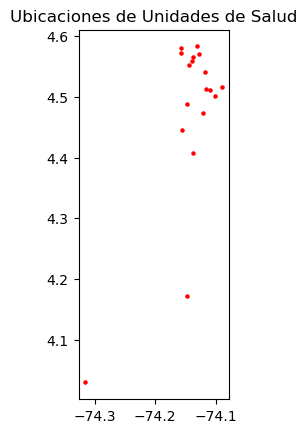

In [62]:
import matplotlib.pyplot as plt

# Crear un mapa básico
gdf.plot(marker='o', color='red', markersize=5)
plt.title("Ubicaciones de Unidades de Salud")
plt.show()


In [64]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Ruta al archivo CSV
csv_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

# Cargar el archivo CSV
df = pd.read_csv(csv_path)

# Verificar las primeras filas para confirmar que se leyeron correctamente
print(df.head())

# Crear una geometría de puntos a partir de las columnas 'X' y 'Y'
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Verificar las primeras filas del GeoDataFrame
print(gdf.head())

# Si deseas guardar el GeoDataFrame como un archivo shapefile, puedes hacerlo de la siguiente manera:
# gdf.to_file('unidades_salud.shp')


   ID               DIRECCION  CIUDAD          X         Y
0   1         CL 80C S 17C 23  BOGOTA -74.141770  4.535430
1   2       KR 45 C 72 35 SUR  BOGOTA -74.162464  4.571049
2   3          CR 8 C 75 C 37  BOGOTA   0.000000  0.000000
3   4  KR 13 ESTE 74 B 31 SUR  BOGOTA -74.093760  4.516314
4   5        CL 65 SUR 6 A 11  BOGOTA -74.112087  4.533924
   ID               DIRECCION  CIUDAD          X         Y  \
0   1         CL 80C S 17C 23  BOGOTA -74.141770  4.535430   
1   2       KR 45 C 72 35 SUR  BOGOTA -74.162464  4.571049   
2   3          CR 8 C 75 C 37  BOGOTA   0.000000  0.000000   
3   4  KR 13 ESTE 74 B 31 SUR  BOGOTA -74.093760  4.516314   
4   5        CL 65 SUR 6 A 11  BOGOTA -74.112087  4.533924   

                    geometry  
0  POINT (-74.14177 4.53543)  
1  POINT (-74.16246 4.57105)  
2                POINT (0 0)  
3  POINT (-74.09376 4.51631)  
4  POINT (-74.11209 4.53392)  


In [66]:
# Guardar el primer GeoDataFrame (unidades de salud) como shapefile
gdf_unidades_salud = gpd.GeoDataFrame(df_unidades_salud, geometry=geometry_unidades_salud)
gdf_unidades_salud.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp')

# Guardar el segundo GeoDataFrame (usuarios diciembre contributivo) como shapefile
gdf_contributivo = gpd.GeoDataFrame(df_contributivo, geometry=geometry_contributivo)
gdf_contributivo.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\usuarios_diciembre_contributivo.shp')


NameError: name 'df_unidades_salud' is not defined

In [68]:
# Guardar el primer GeoDataFrame (unidades de salud) como shapefile
gdf_unidades_salud = gpd.GeoDataFrame(df, geometry=geometry)  # Usando el df y geometry que ya tienes
gdf_unidades_salud.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp')

# Guardar el segundo GeoDataFrame (usuarios diciembre contributivo) como shapefile
gdf_contributivo = gpd.GeoDataFrame(df_contributivo, geometry=geometry_contributivo)  # Asumiendo que ya tienes el gdf_contributivo
gdf_contributivo.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\usuarios_diciembre_contributivo.shp')


C:\Users\billy\anaconda3\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


NameError: name 'df_contributivo' is not defined

In [70]:
# Guardar el GeoDataFrame (usuarios diciembre contributivo) como shapefile
gdf.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\usuarios_diciembre_contributivo.shp')


C:\Users\billy\anaconda3\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [72]:
# Establecer el CRS (por ejemplo, WGS84)
gdf.crs = "EPSG:4326"

# Guardar el GeoDataFrame como un shapefile con el CRS definido
gdf.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\usuarios_diciembre_contributivo.shp')


In [74]:
# Establecer el CRS (por ejemplo, WGS84)
gdf_unidades_salud.crs = "EPSG:4326"

# Guardar el GeoDataFrame de unidades de salud como un shapefile con el CRS definido
gdf_unidades_salud.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp')


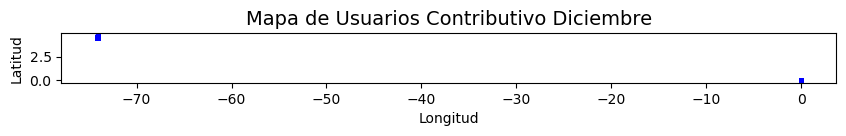

In [76]:
import matplotlib.pyplot as plt

# Crear el mapa básico
fig, ax = plt.subplots(figsize=(10, 10))  # Establecer el tamaño del gráfico
gdf.plot(ax=ax, color='blue', markersize=5)  # Plotear los puntos (usuarios)

# Agregar título y etiquetas
ax.set_title('Mapa de Usuarios Contributivo Diciembre', fontsize=14)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


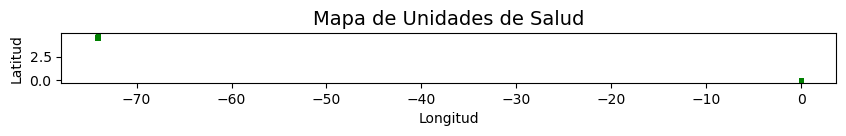

In [78]:
import matplotlib.pyplot as plt

# Ruta al archivo shapefile de las unidades de salud
shapefile_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp'

# Cargar el shapefile como GeoDataFrame
gdf_unidades_salud = gpd.read_file(shapefile_path)

# Crear el mapa básico
fig, ax = plt.subplots(figsize=(10, 10))  # Establecer el tamaño del gráfico
gdf_unidades_salud.plot(ax=ax, color='green', markersize=5)  # Plotear los puntos (unidades de salud)

# Agregar título y etiquetas
ax.set_title('Mapa de Unidades de Salud', fontsize=14)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


In [80]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Ruta al archivo shapefile de las unidades de salud
shapefile_unidades_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp'

# Ruta al archivo shapefile de las localidades (polígonos)
shapefile_localidades_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\localidades.shp'

# Cargar los shapefiles como GeoDataFrames
gdf_unidades_salud = gpd.read_file(shapefile_unidades_path)
gdf_localidades = gpd.read_file(shapefile_localidades_path)

# Crear el mapa básico
fig, ax = plt.subplots(figsize=(10, 10))  # Establecer el tamaño del gráfico

# Primero dibujar el polígono de las localidades (suponiendo que 'geometry' tiene los polígonos)
gdf_localidades.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Luego agregar las unidades de salud como puntos sobre el mapa
gdf_unidades_salud.plot(ax=ax, color='green', markersize=5)

# Agregar título y etiquetas
ax.set_title('Mapa de Unidades de Salud y Localidades', fontsize=14)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


DataSourceError: C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\localidades.shp: No such file or directory

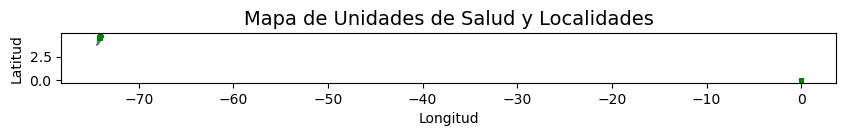

In [82]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Ruta al archivo shapefile de las unidades de salud
shapefile_unidades_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp'

# Ruta al archivo shapefile de las localidades (polígonos)
shapefile_localidades_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'

# Cargar los shapefiles como GeoDataFrames
gdf_unidades_salud = gpd.read_file(shapefile_unidades_path)
gdf_localidades = gpd.read_file(shapefile_localidades_path)

# Crear el mapa básico
fig, ax = plt.subplots(figsize=(10, 10))  # Establecer el tamaño del gráfico

# Primero dibujar el polígono de las localidades (suponiendo que 'geometry' tiene los polígonos)
gdf_localidades.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Luego agregar las unidades de salud como puntos sobre el mapa
gdf_unidades_salud.plot(ax=ax, color='green', markersize=5)

# Agregar título y etiquetas
ax.set_title('Mapa de Unidades de Salud y Localidades', fontsize=14)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


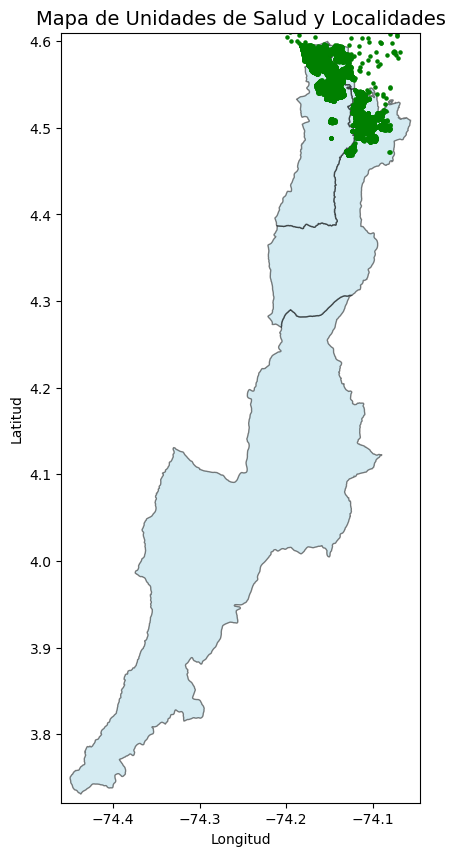

In [84]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Ruta al archivo shapefile de las unidades de salud
shapefile_unidades_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\unidades_salud.shp'

# Ruta al archivo shapefile de las localidades (polígonos)
shapefile_localidades_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\loca.shp'

# Cargar los shapefiles como GeoDataFrames
gdf_unidades_salud = gpd.read_file(shapefile_unidades_path)
gdf_localidades = gpd.read_file(shapefile_localidades_path)

# Crear el mapa básico
fig, ax = plt.subplots(figsize=(10, 10))  # Establecer el tamaño del gráfico

# Dibujar el polígono de las localidades (con un color de fondo)
gdf_localidades.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Dibujar las unidades de salud como puntos sobre el mapa
gdf_unidades_salud.plot(ax=ax, color='green', markersize=5)

# Ajustar los límites del gráfico para que se enfoque en la extensión de las localidades
minx, miny, maxx, maxy = gdf_localidades.total_bounds
ax.set_xlim(minx - 0.01, maxx + 0.01)  # Ajuste de margen para el eje X
ax.set_ylim(miny - 0.01, maxy + 0.01)  # Ajuste de margen para el eje Y

# Agregar título y etiquetas
ax.set_title('Mapa de Unidades de Salud y Localidades', fontsize=14)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()
